In [6]:
import pandas as pd
rownames=pd.read_excel("tunisian names.xlsx")

In [7]:
rownames.shape

(51, 2)

In [17]:
rownames.gender.replace({'female':1 , 'male':0},inplace=True)

In [18]:
rownames['last_letter']=  rownames.name.str[-1]
rownames['second_last_letter']=  rownames.name.str[-2]
rownames['third_last_letter']=  rownames['name'].apply(lambda x: x[-3] if len(x) > 2 else "-");
#if the name shorter than 2 letters is will be replaced with - eventually with 0

In [19]:
rownames['A']=rownames['last_letter'].apply(lambda x: 1 if 'a' in x  else 0) 
#add feature whether the name ends with a or not.
#if it ends with a it s more probably to be a girl

In [24]:
x=rownames[['A']] #the features
y=rownames[['gender']]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


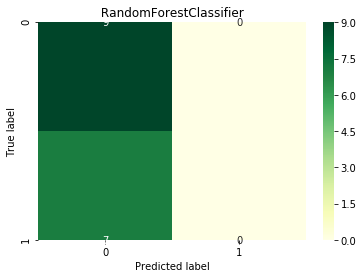

In [27]:
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns       
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
#apply random forest
model = RandomForestClassifier()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
#confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap="YlGn")
plt.title(' RandomForestClassifier ')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
print("the accuracy score for Random Forest Classifier is :",(accuracy_score(y_test, predictions)))
print("the precision score is :",(precision_score(y_test, predictions)))

the accuracy score for Random Forest Classifier is : 0.5625
the precision score is : 0.0


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
